<a href="https://colab.research.google.com/github/DCM2002/Telecom-Customer-Churn/blob/main/Telecom_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as stats


# Load the CSV file
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [45]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [46]:
df_cat= df.select_dtypes(exclude=["number","bool_","float"])
df_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [39]:
df_num=df.select_dtypes(exclude=["object_","bool_"])
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


Q1 - Which customer has highest probability to switch to another telecom (known as churn)

Q2 - What could be the plausible reason why churn is happening

Q3 - How good the prediction is? Can we reply on this predictive analytics

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>, <Axes: >]],
      dtype=object)

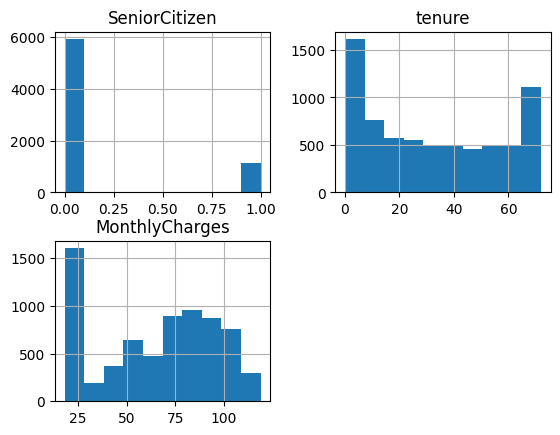

In [43]:
df_num.hist()

<ipython-input-53-eaf17ef51a14>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = df[feature].astype('category').cat.codes  # Convert categorical to numeric
<ipython-input-53-eaf17ef51a14>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = df[feature].astype('category').cat.codes  # Convert categorical to numeric
<ipython-input-53-eaf17ef51a14>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

Categorical Features Correlation with Churn:
gender: -0.008544643224946389
Partner: -0.14998192562005871
Dependents: -0.16312843938822014
PhoneService: 0.011691398865421573
MultipleLines: 0.03804327435621396
InternetService: -0.04709716459089994
OnlineSecurity: -0.2890501761175903
OnlineBackup: -0.19529020856666426
DeviceProtection: -0.17788319529016144
TechSupport: -0.28223248660266
StreamingTV: -0.036302721512460265
StreamingMovies: -0.03880174840533733
Contract: -0.39614953299365374
PaperlessBilling: 0.19145432108004576
PaymentMethod: 0.10785201511046909

Numerical Features Correlation with Churn:
SeniorCitizen     0.150541
tenure           -0.354049
MonthlyCharges    0.192858
Name: Churn, dtype: float64


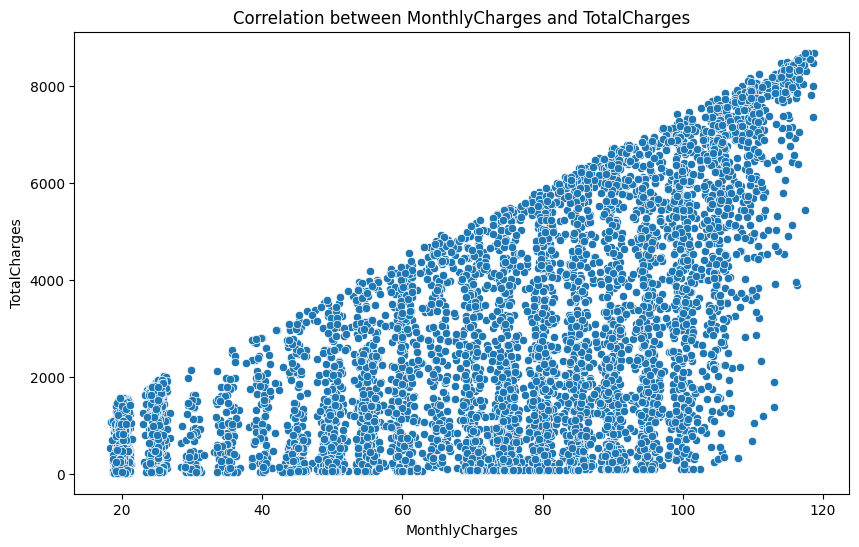

In [53]:
# Convert 'Churn' to binary (Yes = 1, No = 0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Convert 'TotalCharges' to numeric (handle non-numeric values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values in 'TotalCharges'
df = df.dropna(subset=['TotalCharges'])

# Separate categorical and numerical features
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                        'PaperlessBilling', 'PaymentMethod']
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges']

# Calculate Point-Biserial Correlation for categorical features with 'Churn'
categorical_correlations = {}
for feature in categorical_features:
    df[feature] = df[feature].astype('category').cat.codes  # Convert categorical to numeric
    corr, _ = stats.pointbiserialr(df[feature], df['Churn'])
    categorical_correlations[feature] = corr

# Calculate Pearson Correlation for numerical features with 'Churn'
numerical_correlations = df[numerical_features + ['Churn']].corr()['Churn'].drop('Churn')

# Print the correlations
print("Categorical Features Correlation with Churn:")
for feature, corr in categorical_correlations.items():
    print(f"{feature}: {corr}")

print("\nNumerical Features Correlation with Churn:")
print(numerical_correlations)

# Visualize the correlation between 'MonthlyCharges' and 'TotalCharges'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df)
plt.title('Correlation between MonthlyCharges and TotalCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')
plt.show()


In [55]:
#due to monthlychargers having one of the highest co relations with churn and total chargers to avoid any data leakagers we are droppping the monthlychargers column
df.drop('MonthlyCharges',axis=1,inplace=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,151.65,1


array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'Partner'}>,
        <Axes: title={'center': 'Dependents'}>],
       [<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'PhoneService'}>,
        <Axes: title={'center': 'MultipleLines'}>,
        <Axes: title={'center': 'InternetService'}>],
       [<Axes: title={'center': 'OnlineSecurity'}>,
        <Axes: title={'center': 'OnlineBackup'}>,
        <Axes: title={'center': 'DeviceProtection'}>,
        <Axes: title={'center': 'TechSupport'}>],
       [<Axes: title={'center': 'StreamingTV'}>,
        <Axes: title={'center': 'StreamingMovies'}>,
        <Axes: title={'center': 'Contract'}>,
        <Axes: title={'center': 'PaperlessBilling'}>],
       [<Axes: title={'center': 'PaymentMethod'}>,
        <Axes: title={'center': 'TotalCharges'}>,
        <Axes: title={'center': 'Churn'}>, <Axes: >]], dtype=object)

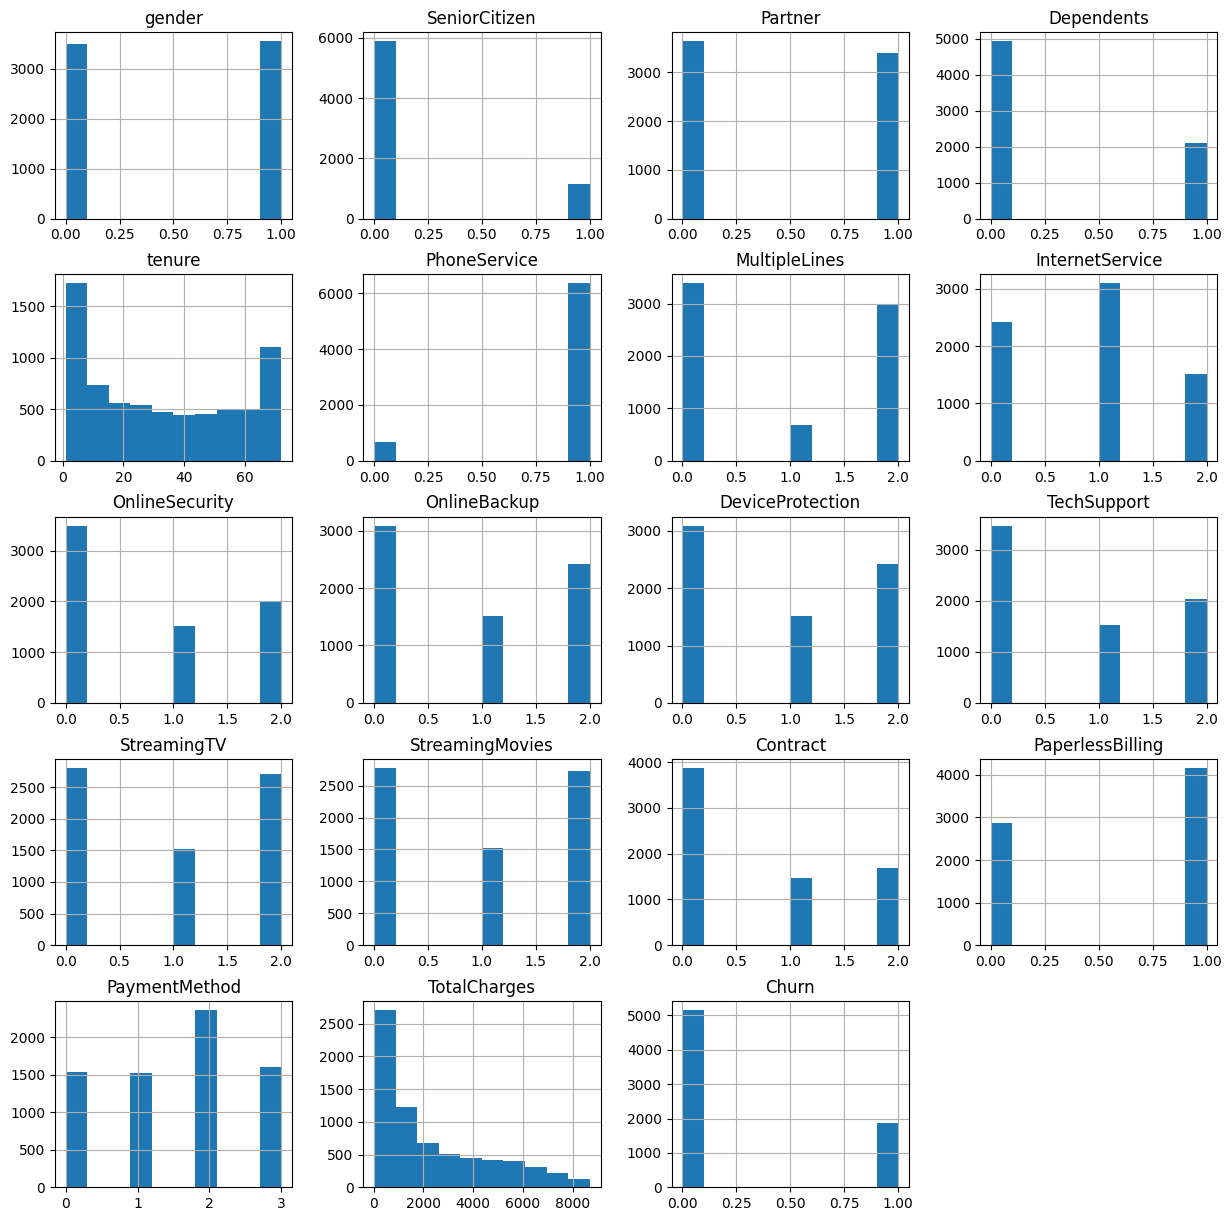

In [59]:
df.hist(figsize=(15,15))

In [60]:
churn_counts = df['Churn'].value_counts()
print(churn_counts)

Churn
0    5163
1    1869
Name: count, dtype: int64


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int8   
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int8   
 4   Dependents        7032 non-null   int8   
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int8   
 7   MultipleLines     7032 non-null   int8   
 8   InternetService   7032 non-null   int8   
 9   OnlineSecurity    7032 non-null   int8   
 10  OnlineBackup      7032 non-null   int8   
 11  DeviceProtection  7032 non-null   int8   
 12  TechSupport       7032 non-null   int8   
 13  StreamingTV       7032 non-null   int8   
 14  StreamingMovies   7032 non-null   int8   
 15  Contract          7032 non-null   int8   
 16  PaperlessBilling  7032 non-null   int8   
 17  

In [69]:
drop_cols=['customerID']
df.drop(drop_cols,axis=1,inplace=True)

In [79]:
record_count=df.shape[0]
print(record_count)

7032


In [91]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Get the number of records after dropping duplicates
record_count = df.shape[0]
print(f"Number of records after dropping duplicates: {record_count}")


Number of duplicate rows: 0
Number of records after dropping duplicates: 7010


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features (X) and the target variable (y)
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames for easier handling (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Print the first few rows of the scaled training and testing sets to verify
print("Scaled Training Data:")
print(X_train_scaled.head())

print("\nScaled Testing Data:")
print(X_test_scaled.head())


Scaled Training Data:
     gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
0 -1.001785       2.270655 -0.969786   -0.653709 -0.672489      0.329755   
1 -1.001785      -0.440402 -0.969786   -0.653709 -1.287204     -3.032551   
2 -1.001785      -0.440402  1.031156   -0.653709  1.335580      0.329755   
3 -1.001785      -0.440402 -0.969786   -0.653709 -1.287204     -3.032551   
4  0.998218       2.270655  1.031156   -0.653709  0.147131      0.329755   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0       1.104686        -1.177071        1.404274     -1.026997   
1       0.050384        -1.177071       -0.913315     -1.026997   
2       1.104686         0.185649       -0.913315      1.236028   
3       0.050384        -1.177071       -0.913315     -1.026997   
4       1.104686         0.185649       -0.913315     -1.026997   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0         -1.027357    -0.920716    -1.113

In [114]:
X_train.info()
X_train.isnull().sum()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5608 entries, 356 to 1771
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5608 non-null   int8   
 1   SeniorCitizen     5608 non-null   int64  
 2   Partner           5608 non-null   int8   
 3   Dependents        5608 non-null   int8   
 4   tenure            5608 non-null   int64  
 5   PhoneService      5608 non-null   int8   
 6   MultipleLines     5608 non-null   int8   
 7   InternetService   5608 non-null   int8   
 8   OnlineSecurity    5608 non-null   int8   
 9   OnlineBackup      5608 non-null   int8   
 10  DeviceProtection  5608 non-null   int8   
 11  TechSupport       5608 non-null   int8   
 12  StreamingTV       5608 non-null   int8   
 13  StreamingMovies   5608 non-null   int8   
 14  Contract          5608 non-null   int8   
 15  PaperlessBilling  5608 non-null   int8   
 16  PaymentMethod     5608 non-null   int8   
 17

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
356,0,1,0,0,16,1,2,0,2,0,0,0,0,0,0,1,2,889.00
211,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,2,25.25
2594,0,0,1,0,65,1,2,1,0,2,2,2,2,2,2,1,0,7082.85
4641,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,3,24.40
2521,1,1,1,0,36,1,2,1,0,0,0,0,0,2,0,1,1,3132.75


In [115]:
test.info()
test.isnull().sum()
test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1402 entries, 6882 to 5280
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1402 non-null   int8   
 1   SeniorCitizen     1402 non-null   int64  
 2   Partner           1402 non-null   int8   
 3   Dependents        1402 non-null   int8   
 4   tenure            1402 non-null   int64  
 5   PhoneService      1402 non-null   int8   
 6   MultipleLines     1402 non-null   int8   
 7   InternetService   1402 non-null   int8   
 8   OnlineSecurity    1402 non-null   int8   
 9   OnlineBackup      1402 non-null   int8   
 10  DeviceProtection  1402 non-null   int8   
 11  TechSupport       1402 non-null   int8   
 12  StreamingTV       1402 non-null   int8   
 13  StreamingMovies   1402 non-null   int8   
 14  Contract          1402 non-null   int8   
 15  PaperlessBilling  1402 non-null   int8   
 16  PaymentMethod     1402 non-null   int8   
 1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
6882,0,1,0,0,71,1,2,1,2,2,0,2,2,0,1,1,1,7181.25,0
6752,0,0,0,0,12,0,1,0,2,0,2,2,0,2,2,0,3,552.10,0
245,1,1,0,0,4,1,0,1,2,0,0,0,0,0,0,0,2,273.40,0
1889,1,0,0,0,14,0,1,0,0,2,0,0,0,0,0,1,3,419.70,0
6830,1,0,0,0,35,1,0,2,1,1,1,1,1,1,2,1,3,684.40,0
